# 

## Capstone Project - Women’s  E-Commerce Clothing Reviews Sentiment Analysis

### What is Sentiment Analysis
Sentiment Analysis is a process of identifying opinions and provide a quantifiable result using AI and Natural Language Processing techniques to process raw data. In today's world customer reviews have become the place where people share their opinions. Sentiment analysis is used in e-commerce platforms to analyse gathered customer feedback.


### Problem Definition
Sentiment Analysis is an opportunity to understand what customer opinions/emotions are when they recommend products, by analysing online conversations. The goal is to develop a supervised machine learning model to predict user sentiment whether positive, negative, and neutral and to predict whether the product is recommended to other users.


### Business Question
Sentiment Analysis can help businesses and services to understand their customer’s experience and make necessary changes to improve the quality of their services.

Business Question:

- Understand customer’s opinion whether positive, negative, or neutral.
- Identify customer product recommendation.
- Identify best/worst customer opinion.
- Identify Target audience for the shop.
- Identify most/least reviewed Items.  
- Focus on what division/department or clothing class to be improved in the business.
- Stock management and optimization 

In a business it is vital to understand all negative and positive customer feedback to improve the business or brand value. 


### Dataset

Dataset downloaded from  https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/download

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:


- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

Data is real commercial data. Dataset had some unnecessary columns (unnamed: 0) some values were missing in Title, Review Text, Division, Department and Class. This data is not available on an ongoing basis.

### Import libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy
import regex as re
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

#### Load data

In [2]:
## Loading the data
df = pd.read_csv('./Data/Womens Clothing E-Commerce Reviews.csv')
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## EDA

#### Inspect the data

- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
  
    - **Missing Values** (coded [as zero of empty strings] or values not present)



In [3]:
df.shape

(23486, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


###### Check for **Null** values 

In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

###### Drop Null Values

In [6]:
df = df.dropna()

In [7]:
df.shape

(19662, 11)

In [8]:
# After dropping all null values dataset shape change (23486, 11) to (19662, 11)

###### Drop Column Unnamed as it has no value in Analysis

In [9]:
df1=df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


###### Check for **Zero** values 

In [11]:
df1.isin([0]).sum()

Clothing ID                   0
Age                           0
Title                         0
Review Text                   0
Rating                        0
Recommended IND            3575
Positive Feedback Count    8930
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [12]:
# Both Features can have zero values

###### check for unique values in each column

In [13]:
df1.nunique()

Clothing ID                 1095
Age                           77
Title                      13983
Review Text                19656
Rating                         5
Recommended IND                2
Positive Feedback Count       79
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

###### check for value counts in each column

In [14]:
df1['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
887       1
48        1
1127      1
1143      1
1199      1
Name: Clothing ID, Length: 1095, dtype: int64

In [15]:
df1['Title'].value_counts()

Love it!                                             136
Beautiful                                             95
Love                                                  88
Love!                                                 83
Beautiful!                                            72
                                                    ... 
Beautiful, well made dress but little flexibility      1
Great unique striped tee                               1
Perfect for party                                      1
Great fall blouse                                      1
Silky drape, super pretty design                       1
Name: Title, Length: 13983, dtype: int64

In [16]:
df1['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [17]:
df1['Recommended IND'].value_counts()

1    16087
0     3575
Name: Recommended IND, dtype: int64

In [18]:
df1['Positive Feedback Count'].value_counts()

0     8930
1     3502
2     1923
3     1258
4      803
      ... 
98       1
84       1
68       1
52       1
95       1
Name: Positive Feedback Count, Length: 79, dtype: int64

In [19]:
df1['Division Name'].value_counts()

General           11664
General Petite     6778
Intimates          1220
Name: Division Name, dtype: int64

In [20]:
df1['Department Name'].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

In [21]:
df1['Class Name'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Chemises             1
Casual bottoms       1
Name: Class Name, dtype: int64

In [22]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477
std,200.227528,12.258122,1.112224,0.385708,5.834285
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [23]:
# Age group is between 18 - 99 with median age of 41 and mean age of 43. Positive feedback count varies between 0-122.

<AxesSubplot:>

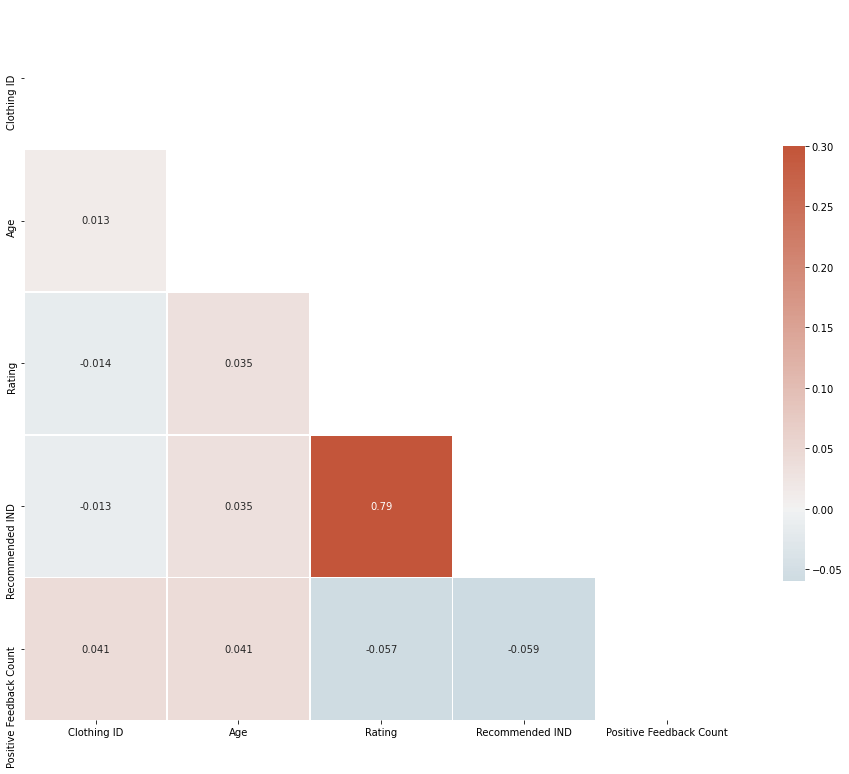

In [24]:
# correlation heatmap
plt.figure(figsize=(16, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
sns.heatmap(df1.corr(), annot=True, mask=mask, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Rating and Recommended IND are highly correlated.

array([[<AxesSubplot:title={'center':'Clothing ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Recommended IND'}>],
       [<AxesSubplot:title={'center':'Positive Feedback Count'}>,
        <AxesSubplot:>]], dtype=object)

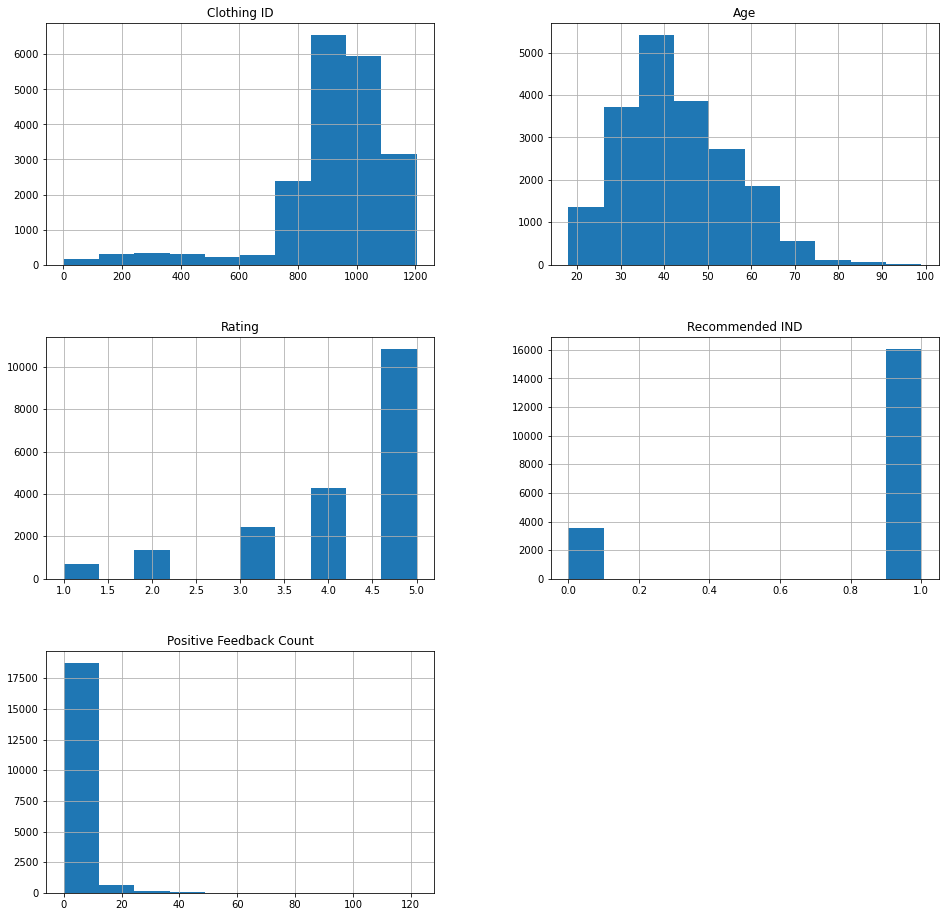

In [26]:
df1.hist(figsize=(16,16))

In [27]:
# sns.pairplot(df1, hue='Recommended IND')

In [28]:
# cothing which has high rating(4 and 5) are mostly recommended while clothing which has low rating are unlikely to be recommended.

### Data Visualization

###### Ratings

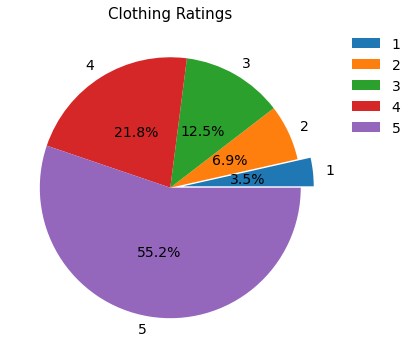

In [29]:
att=df1.groupby("Rating")['Rating'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = '1','2','3','4','5'
my_explode = (0.1, 0,0,0,0)
plt.pie(x=att, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5,textprops={'fontsize': 14})
plt.title("Clothing Ratings", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [30]:
# Based on above chart we can see that 55.2% has the highest rating of 5, followed by 21.8 % of rating of 4.

###### Recommendations

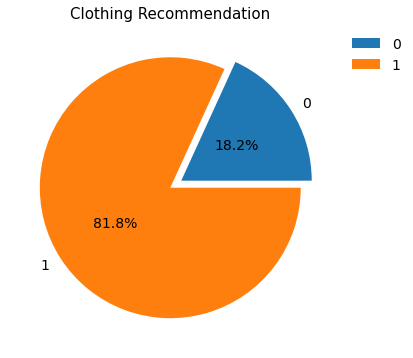

In [31]:
att=df1.groupby("Recommended IND")['Recommended IND'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=att, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5,textprops={'fontsize': 14})
plt.title("Clothing Recommendation", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [ ]:
# Product recommendation percentage is 81.8%.

###### Recommendation vs Ratings

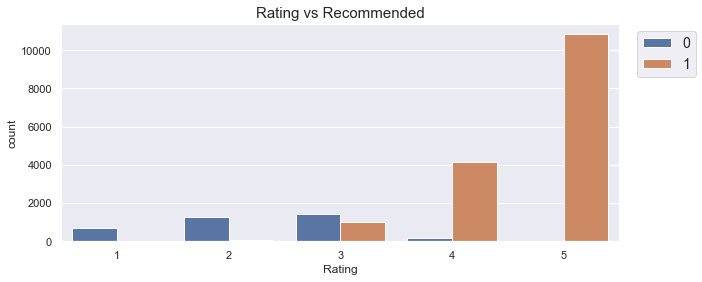

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="Rating",hue="Recommended IND", data=df1).set_title("Rating vs Recommended",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

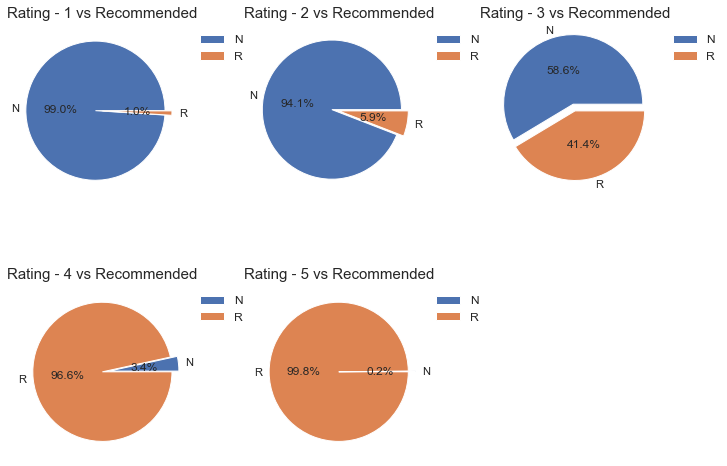

In [33]:
Rating1= df1[df1.Rating == 1]
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(231)
ax = plt.gca()
labels = 'N','R'
my_explode = (0.1, 0)
plt.pie(x=Rating1.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Rating - 1 vs Recommended", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Rating2= df1[df1.Rating == 2]
plt.subplot(232)
ax = plt.gca()
plt.pie(x=Rating2.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Rating - 2 vs Recommended", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Rating3= df1[df1.Rating == 3]
plt.subplot(233)
ax = plt.gca()
plt.pie(x=Rating3.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Rating - 3 vs Recommended", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Rating4= df1[df1.Rating == 4]
plt.subplot(234)
ax = plt.gca()
plt.pie(x=Rating4.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Rating - 4 vs Recommended", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Rating5= df1[df1.Rating == 5]
plt.subplot(235)
ax = plt.gca()
plt.pie(x=Rating5.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Rating - 5 vs Recommended", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)



In [34]:
# Ratings with 1 and 2 have the least percentage of product recommendation(1% and 6%), while Rating 4 and Rating 5 have the highest percentage of product recommendation.
# Rating 3 has mix resutls of product recommendations.

#### Top 10 Recommended Items

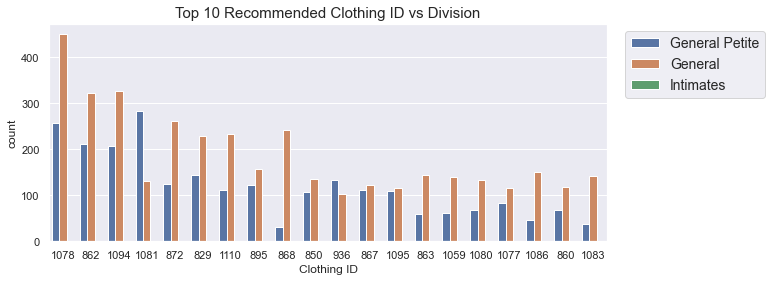

In [115]:
recom_cloth= df1[df1["Recommended IND"] == 1]
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="Clothing ID",hue="Division Name", data=recom_cloth,order = recom_cloth['Clothing ID'].value_counts().iloc[:20].index ).set_title("Top 10 Recommended Clothing ID vs Division",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

# recom_cloth= df1[df1["Recommended IND"] == 1]
# sns.set_theme(style="darkgrid")
# plt.figure(figsize = (10, 4))
# sns.countplot(x="Clothing ID", data=recom_cloth,order = recom_cloth['Clothing ID'].value_counts().iloc[:10].index ).set_title("Top 20 Recommended Clothing ID",fontsize=15)
# plt.show()


#### Top 10 Not - Recommended Items vs Division

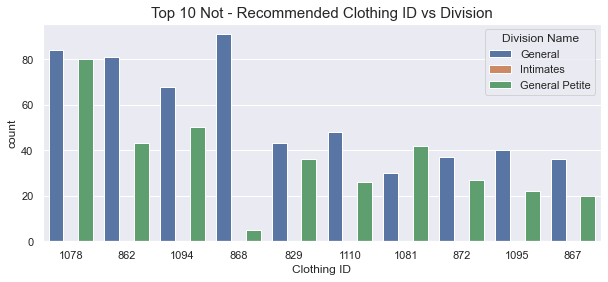

In [117]:
recom_cloth= df1[df1["Recommended IND"] == 0]
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="Clothing ID",hue="Division Name", data=recom_cloth,order = recom_cloth['Clothing ID'].value_counts().iloc[:10].index ).set_title("Top 10 Not - Recommended Clothing ID vs Division",fontsize=15)
plt.show()


###### Reviews vs Division Distribution

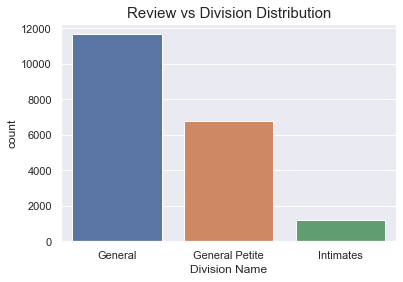

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (6, 4))
sns.countplot(x="Division Name", data=df1).set_title("Review vs Division Distribution",fontsize=15)
plt.show()

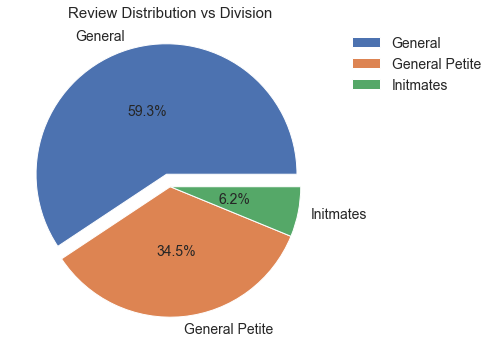

In [38]:
att=df1.groupby("Division Name")['Division Name'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = 'General','General Petite','Initmates'
my_explode = (0.1, 0,0)
plt.pie(x=att, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5,textprops={'fontsize': 14} )
plt.title("Review Distribution vs Division", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [39]:
# The majority of the reviews(59.3%) were under General Division, followed by General Petite (34.5%) and Intimates(6.2%)

###### Reviews vs Department Distribution

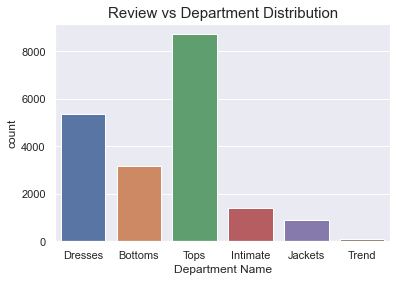

In [40]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (6, 4))
sns.countplot(x="Department Name", data=df1).set_title("Review vs Department Distribution",fontsize=15)
plt.show()

In [41]:
# The majority of the reviews were received for Tops Department(more than 8000) , follwed by Dress Department (more than 5000).
# Trend Department were received the least amount of reviews.

###### Reviews vs Class Distribution 

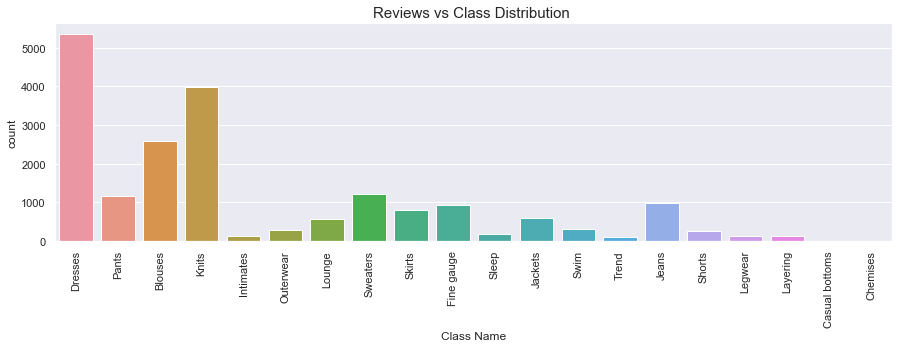

In [42]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.countplot(x="Class Name", data=df1).set_title("Reviews vs Class Distribution ",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [43]:
# Dresses and knits were received most of the reviews.Casual bottoms and chemises class were received the least amount of reviews.

###### Division vs Ratings

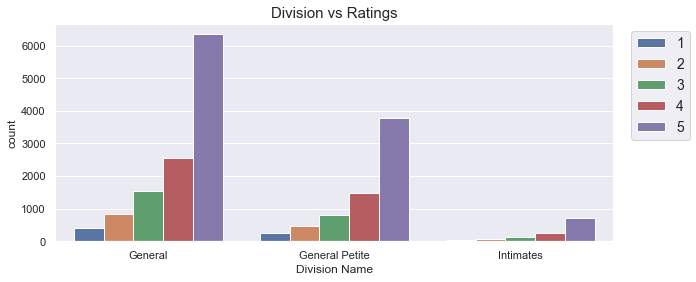

In [44]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="Division Name",hue="Rating", data=df1).set_title("Division vs Ratings",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

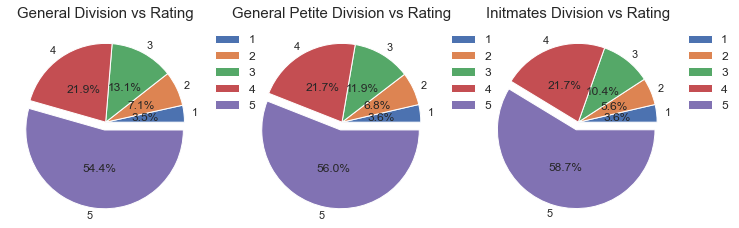

In [45]:
Div11= df1[df1["Division Name"] == "General"]
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
labels = '1','2','3','4','5'
my_explode = (0, 0,0,0,0.1)
plt.pie(x=Div11.groupby("Rating")['Rating'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("General Division vs Rating", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Div12= df1[df1["Division Name"] == "General Petite"]
plt.subplot(132)
ax = plt.gca()
plt.pie(x=Div12.groupby("Rating")['Rating'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("General Petite Division vs Rating", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Div13= df1[df1["Division Name"] == "Intimates"]
plt.subplot(133)
ax = plt.gca()
plt.pie(x=Div13.groupby("Rating")['Rating'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Initmates Division vs Rating", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

In [46]:
# Every divisiont has majority of positive ratings.All Divisions are performing in almost same level.

### Division

###### Division vs Recommendation

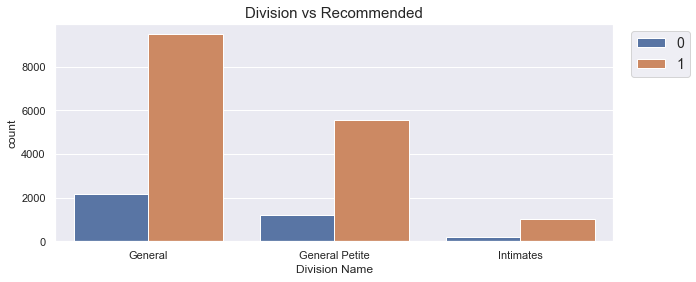

In [47]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="Division Name",hue="Recommended IND", data=df1).set_title("Division vs Recommended",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

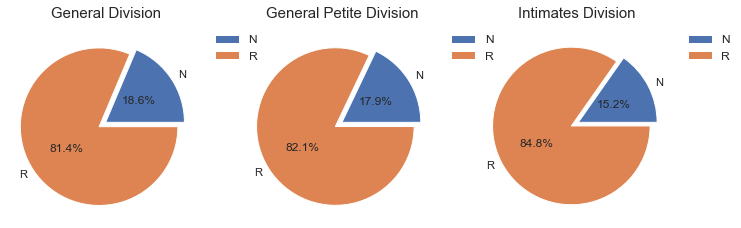

In [48]:
Div11= df1[df1["Division Name"] == "General"]
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
labels = 'N','R'
my_explode = (0, 0.1)
plt.pie(x=Div11.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("General Division", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Div12= df1[df1["Division Name"] == "General Petite"]
plt.subplot(132)
ax = plt.gca()
plt.pie(x=Div12.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("General Petite Division", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

Div13= df1[df1["Division Name"] == "Intimates"]
plt.subplot(133)
ax = plt.gca()
plt.pie(x=Div13.groupby("Recommended IND")['Recommended IND'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Intimates Division ", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)

plt.show()

In [49]:
# More than 10000 items were recommended under General Division which is 81.4% of total product reviews under General Division.
# Intimates has the highest percentage of product recommendation which is around 1000 reviews.
# Overall General department has high power of generating revenue compared to other division.

### Department

###### Department vs Ratings

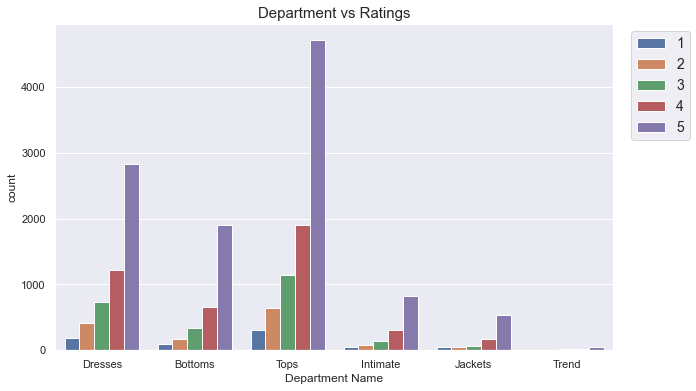

In [50]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 6))
sns.countplot(x="Department Name",hue="Rating", data=df1).set_title("Department vs Ratings",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

###### Department vs Recommendation

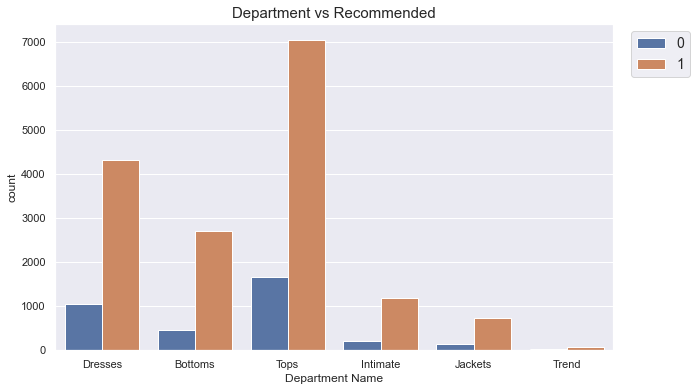

In [51]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 6))
sns.countplot(x="Department Name",hue="Recommended IND", data=df1).set_title("Department vs Recommended",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

In [52]:
# Tops department has the highest amount of production recommendation and highest rating, followed by Dress Department. Trend department has least number of reviews and recommendation.

### Clothing Class

###### Clothing Class vs Ratings

[]

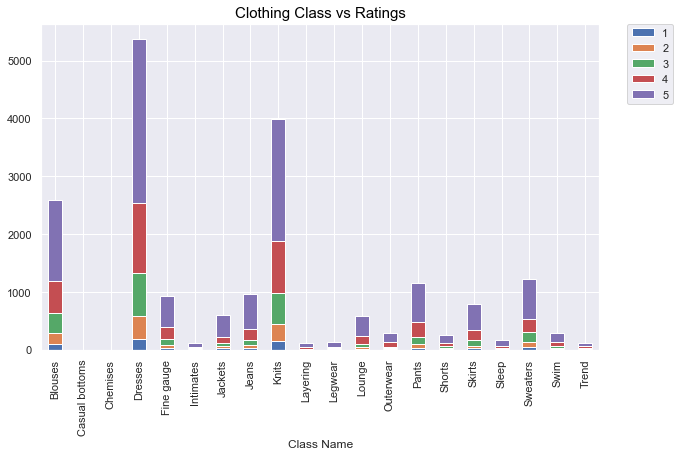

In [53]:
# sns.set_theme(style="darkgrid")
# plt.figure(figsize = (10, 4))
# sns.countplot(x="Class Name",hue="Rating", data=df_tweet).set_title("Clothing Class vs Ratings",fontsize=15)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
# plt.show()

crosstab_df = pd.crosstab(df1['Class Name'], df1['Rating'])

ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Clothing Class vs Ratings", color='black',fontsize=15)
ax.plot()

In [54]:
# Dresses, Knits and Blouses have the highest and lowest ratings reviews.

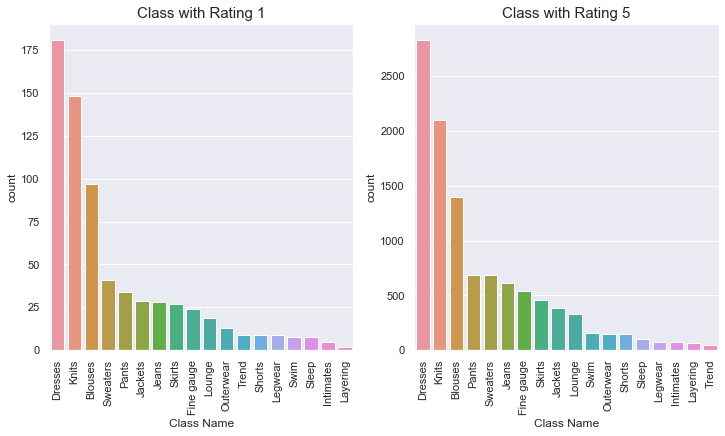

In [55]:
Rating_1= df1[df1["Rating"] == 1]
ClassD = Rating_1["Class Name"]
plt.figure(figsize = (12, 6))
plt.subplots_adjust(wspace=0.2, hspace=1)
sns.set_theme(style="darkgrid")

plt.subplot(121)
sns.countplot(x="Class Name", data=Rating_1, order = Rating_1['Class Name'].value_counts().index).set_title("Class with Rating 1",fontsize=15)
plt.xticks(rotation=90)

plt.subplot(122)
Rating_5= df1[df1["Rating"] == 5]
sns.countplot(x="Class Name", data=Rating_5,order = Rating_5['Class Name'].value_counts().index).set_title("Class with Rating 5",fontsize=15)
plt.xticks(rotation=90)

plt.show()

In [56]:
# Ratings1 vs Rating 5 seems to have similar pattern for most of the Classes except trend class.

###### Clothing class vs Recommendation

[]

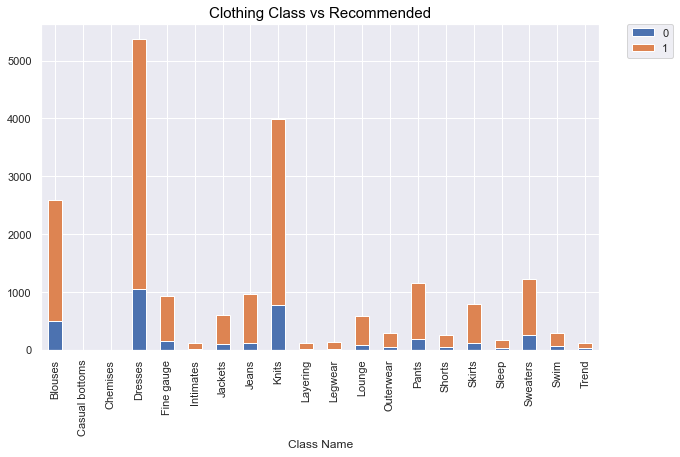

In [57]:
# sns.set_theme(style="darkgrid")
# plt.figure(figsize = (10, 4))
# sns.countplot(x="Class Name",hue="Recommended IND", data=df_tweet).set_title("Clothing Class vs Recommended",fontsize=15)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
# plt.show()


crosstab_df = pd.crosstab(df1['Class Name'], df1['Recommended IND'])
ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Clothing Class vs Recommended", color='black',fontsize=15)
ax.plot()

In [58]:
# Recommendations are higher in every class.

### Age 

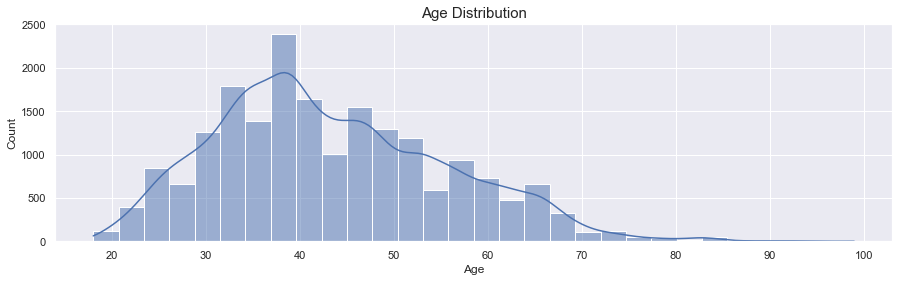

In [59]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.histplot(x="Age", data=df1,bins=30,kde=True).set_title("Age Distribution",fontsize=15)
plt.show()

In [60]:
# Target audience for the reviews are age between 30 to 50

 #### Age vs Division

Text(0.5, 1.0, ' Age vs Division')

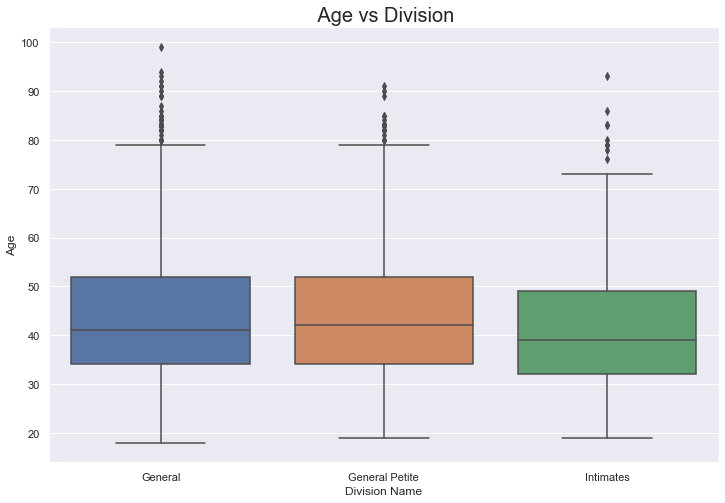

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Division Name", y="Age", data=df).set_title(" Age vs Division", fontsize=20)

In [62]:
# Target reviwers are mainly between 35 to 52 for General and General Petite and Initmates reviwers are slightly younger. 

 #### Age vs Department

Text(0.5, 1.0, ' Age vs Department')

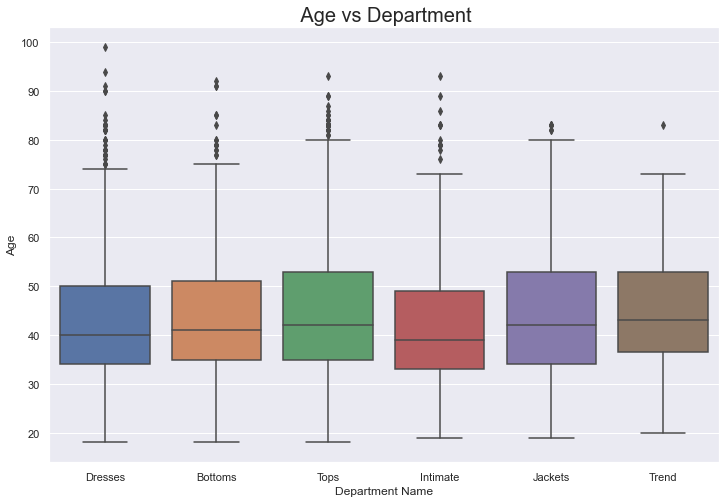

In [63]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Department Name", y="Age", data=df).set_title(" Age vs Department", fontsize=20)

In [64]:
# Initmate Departmnet has younger reviwer range compared to other department.

 #### Age vs Clothing Class

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Dresses'),
  Text(1, 0, 'Pants'),
  Text(2, 0, 'Blouses'),
  Text(3, 0, 'Knits'),
  Text(4, 0, 'Intimates'),
  Text(5, 0, 'Outerwear'),
  Text(6, 0, 'Lounge'),
  Text(7, 0, 'Sweaters'),
  Text(8, 0, 'Skirts'),
  Text(9, 0, 'Fine gauge'),
  Text(10, 0, 'Sleep'),
  Text(11, 0, 'Jackets'),
  Text(12, 0, 'Swim'),
  Text(13, 0, 'Trend'),
  Text(14, 0, 'Jeans'),
  Text(15, 0, 'Shorts'),
  Text(16, 0, 'Legwear'),
  Text(17, 0, 'Layering'),
  Text(18, 0, 'Casual bottoms'),
  Text(19, 0, 'Chemises')])

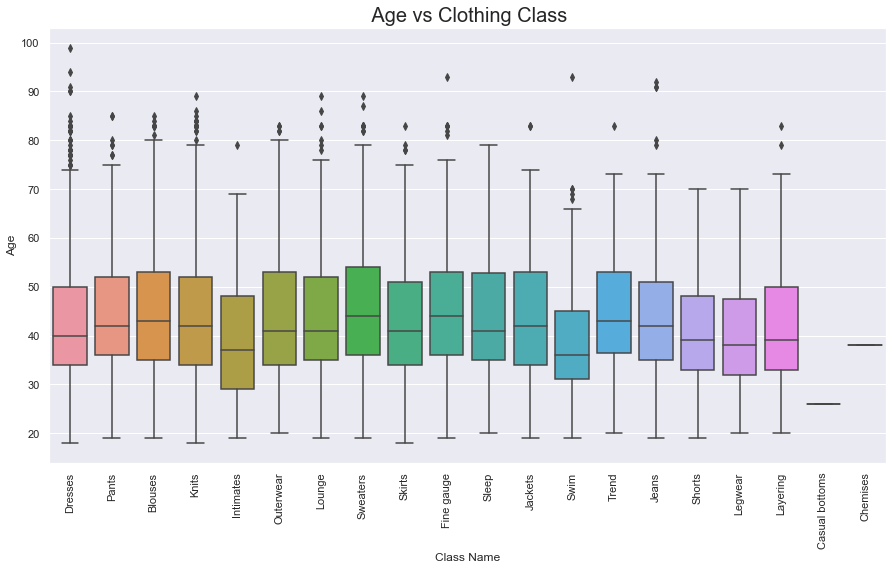

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Class Name", y="Age", data=df).set_title(" Age vs Clothing Class", fontsize=20)
plt.xticks(rotation=90)

In [66]:
# Target Review audience for Swim Class 30 to 65 (age range) while Intimate review audience vary between age 30 to 70.
# Casual bottoms and Chemises only popular among young customers
# Dresses, Blouses, Knits, Outerwear, Sweaters and Sleep Classes  target audience are range between 20 to 80.

#### Age vs Recommendation

Text(0.5, 1.0, ' Age vs Recommendation')

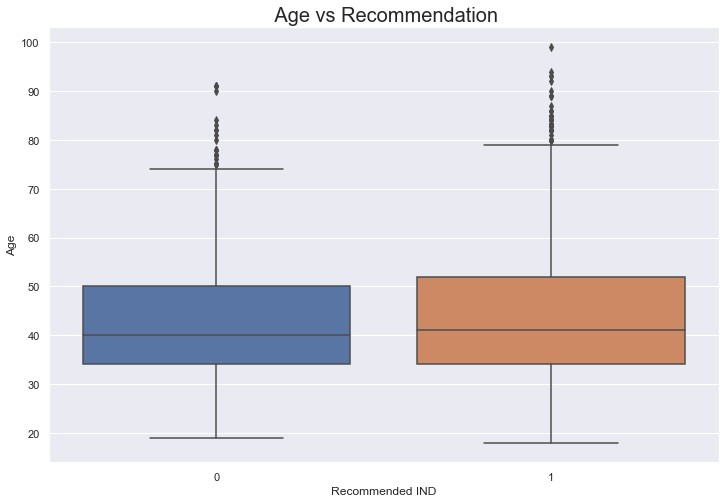

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Recommended IND", y="Age", data=df).set_title(" Age vs Recommendation", fontsize=20)

In [68]:
# Both Recommended and Non Recommended products reviwers belong to age 35 to 50.

#### Age vs Rating

Text(0.5, 1.0, ' Age vs Ratings')

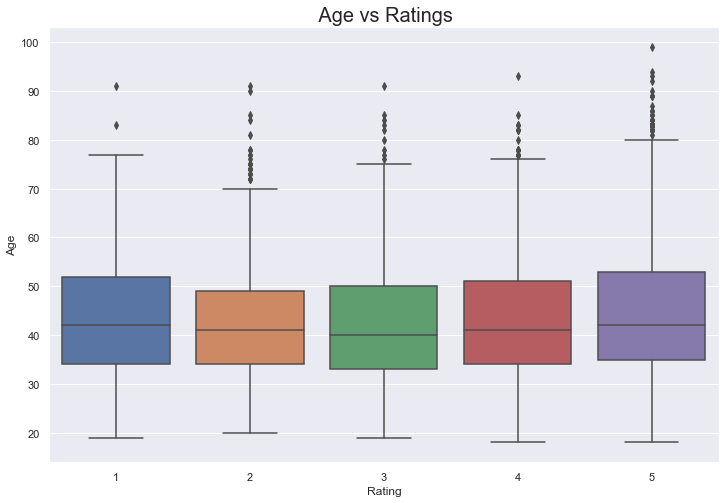

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Rating", y="Age", data=df).set_title(" Age vs Ratings", fontsize=20)

In [70]:
# This has same pattern as recommended vs Age.

###### Review (Text) Analysis

###### Word cloud Analysis

In [71]:
# ANSWER
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


###### Data Cleaning 

In [72]:
def clean_text(text):
    
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    
    # remove double quotes
    text = re.sub(r'"', '', text)
    # remove special characters, numbers, punctuations
    text = re.sub(r'[^a-zA-Z#]', ' ', text)
    # remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ' , text)
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    
    return text

In [73]:
# Clean Data
df1['Review Text'] = df1['Review Text'].apply(clean_text)
df1['Title'] = df1['Title'].apply(clean_text)

In [74]:
df1['Review Text'] 

2        I had such high hopes for this dress and reall...
3        I love  love  love this jumpsuit  it  fun  fli...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses  but this one is no...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such gr...
23482    It reminds me of maternity clothes  soft  stre...
23483    This fit well  but the top was very see throug...
23484    I bought this dress for wedding have this summ...
23485    This dress in lovely platinum is feminine and ...
Name: Review Text, Length: 19662, dtype: object

In [75]:
df1['Title']

2                                  Some major design flaws
3                                         My favorite buy 
4                                         Flattering shirt
5                                  Not for the very petite
6                                     Cagrcoal shimmer fun
                               ...                        
23481                       Great dress for many occasions
23482                           Wish it was made of cotton
23483                                Cute  but see through
23484    Very cute dress  perfect for summer parties an...
23485                      Please make more like this one 
Name: Title, Length: 19662, dtype: object

###### Word cloud before removing stopwords for Review Text

Word Cloud for Review Text


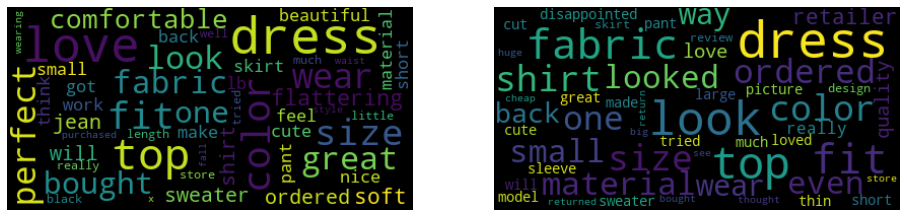

In [76]:
# Draw Word Cloud for Recommended

print("Word Cloud for Review Text")
recom=df1[(df1['Recommended IND'] == 1) & (df1['Rating'] == 5)]
recom['Review Text']
text = " ".join(review for review in recom["Review Text"])

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(121)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for not Recommended
not_recom=df1[(df1['Recommended IND'] == 0) & (df1['Rating'] == 1)]
not_recom['Review Text']
text = " ".join(review for review in not_recom["Review Text"])
plt.subplot(122)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [77]:
# Top words with Rating 5 and recommended are Dress,Love, fit, comfortable(Main reasons for positive reviews)
# Top Words with Rating 1 and Not recommended are Fabric, dress, material size( main reasons for negative reviews)

Word Cloud for Title


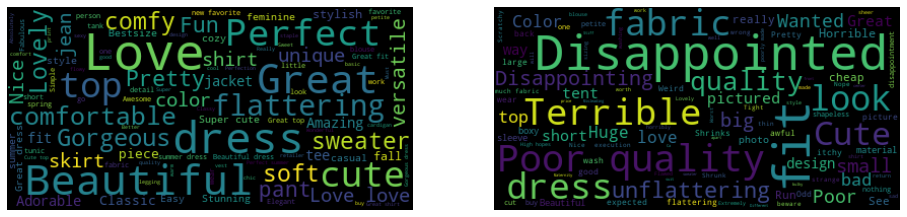

In [78]:
print("Word Cloud for Title")

recom1=df1[(df1['Recommended IND'] == 1) & (df1['Rating'] == 5)]
recom1['Title']
text = " ".join(review for review in recom1["Title"])

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(121)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for not Recommended
not_recom1=df1[(df1['Recommended IND'] == 0) & (df1['Rating'] == 1)]
not_recom1['Title']
text = " ".join(review for review in not_recom1["Title"])
plt.subplot(122)
ax = plt.gca()

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [79]:
# first figure shows positive top words while second figure capturing negative top words from title.

###### Visualising Top 20 unigrams

###### Visualising Top 20 Unigrams of Review Text

In [80]:
#top_words function
def top_words(text,n,ngram):
    counts = CountVectorizer(ngram_range=(ngram,ngram))
    bog = counts.fit_transform(text)
    sum_word = bog.sum(axis = 0)
    word_fr = [(word, sum_word[0,i]) for word, i in counts.vocabulary_.items()]
    word_fr =sorted(word_fr, key = lambda x: x[1], reverse=True)
    return word_fr[:n]

In [81]:
#top_words function
def bottom_words(text,n,ngram):
    counts = CountVectorizer(ngram_range=(ngram,ngram))
    bog = counts.fit_transform(text)
    sum_word = bog.sum(axis = 0)
    word_fr = [(word, sum_word[0,i]) for word, i in counts.vocabulary_.items()]
    word_fr =sorted(word_fr, key = lambda x: x[1], reverse=False)
    return word_fr[:n]

In [82]:
top_20_words = top_words(df1['Review Text'],20,1)

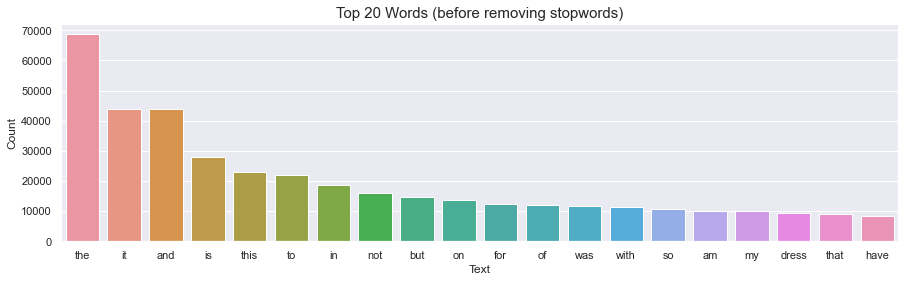

In [83]:
# Covert top_20_words into dataframe
dftopwords=pd.DataFrame(top_20_words,columns=['Text', 'Count'])
dftopwords
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords).set_title("Top 20 Words (before removing stopwords)",fontsize=15)
plt.show()


###### Visualising Top 20 Unigrams of Tiltle

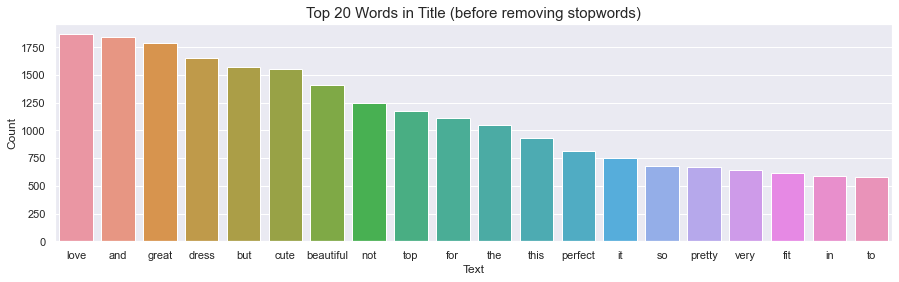

In [84]:
top_20_words_title = top_words(df1['Title'],20,1)
# Covert top_20_words into dataframe
dftopwords1=pd.DataFrame(top_20_words_title,columns=['Text', 'Count'])
dftopwords1
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords1).set_title("Top 20 Words in Title (before removing stopwords)",fontsize=15)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

In [85]:
# As we can see that above both graphs are highly consists with stop words. Which leads us to poor judment above products or sentiment.

###### Visualising Top 20 Trigrams of  Review Text and Tiltle

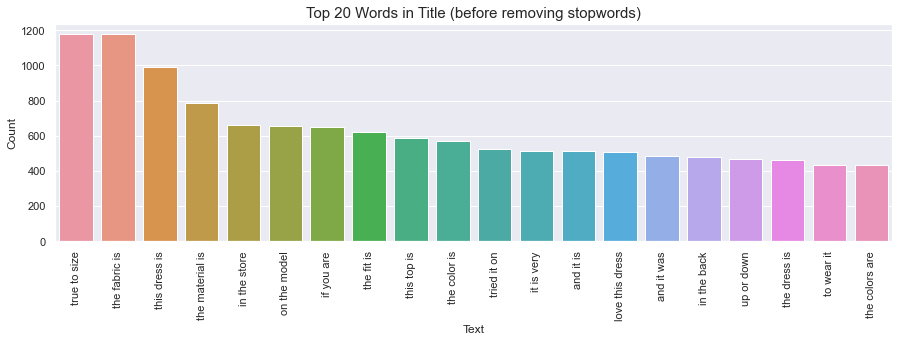

In [86]:
top_20_words = top_words(df1['Review Text'],20,3)
# Covert top_20_words into dataframe
dftopwords3=pd.DataFrame(top_20_words,columns=['Text', 'Count'])
dftopwords3
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords3).set_title("Top 20 Words in Title (before removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()


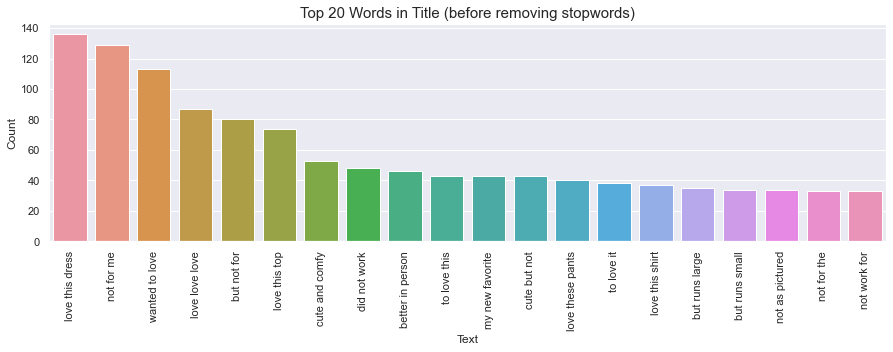

In [87]:
top_20_words_title = top_words(df1['Title'],20,3)
# Covert top_20_words into dataframe
dftopwords4=pd.DataFrame(top_20_words_title,columns=['Text', 'Count'])
dftopwords4
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords4).set_title("Top 20 Words in Title (before removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [88]:
# Taking three words can find more specific reasons  and they are trending positive.

###### Remove stop words, puctuations and  perform lemmatization

In [89]:
nlp = spacy.load('en_core_web_sm')

In [90]:
# remove stop words, puctuations and  perform lemmatization
def convert_text(text):

    doc = nlp(text)
    t = [w for w in doc if not (w.is_stop | w.is_punct)]
    x = [w.lemma_.lower() for w in t]

    s= " ".join(x)

    return s

In [91]:
%%time
df1['Review Text'] = df1['Review Text'].apply(convert_text)
df1['Title'] = df1['Title'].apply(convert_text)

Wall time: 4min 13s


In [92]:
df1['Review Text'].head(10)

2     high hope dress want work initially order peti...
3     love   love   love jumpsuit     fun   flirty  ...
4     shirt flattering adjustable tie   perfect leng...
5     love tracy reese dress   petite    foot tall u...
6     ade basket hte mintue look like person    stor...
7     order carbon store pick   ton stuff     try pa...
8     love dress usually xs run little snug bust ord...
9          lb order petite sure length   long typica...
10    dress run small esp zipper area run order sp t...
12    find reliant review write savvy shopper past  ...
Name: Review Text, dtype: object

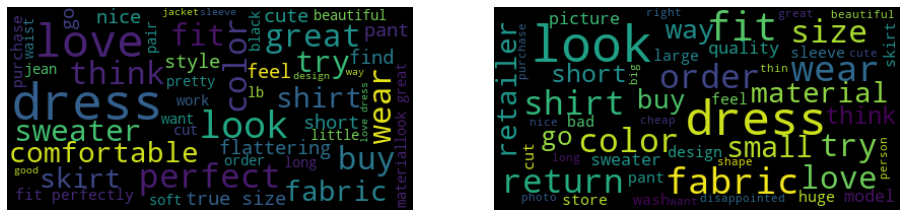

In [93]:
# Draw Word Cloud for Recommended
positive=df1[(df1['Recommended IND'] == 1) & (df1['Rating'] == 5)]
positive['Review Text']
text = " ".join(review for review in positive["Review Text"])

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(121)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for not Recommended
neutral=df1[(df1['Recommended IND'] == 0) & (df1['Rating'] == 1)]
neutral['Review Text']
text = " ".join(review for review in neutral["Review Text"])
plt.subplot(122)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



plt.show()

In [94]:
# Figure 1 -  Shows top words for the highest rating and for product recommendation. As we can see that most of words are positive.
# Figure 2 -  Shows top words for the lowest rating and zero product recommendation. As we can see those areas to be focus  on based on top words are related to dress, material, colour, size

###### Visualization of ngrams After removing Stop words

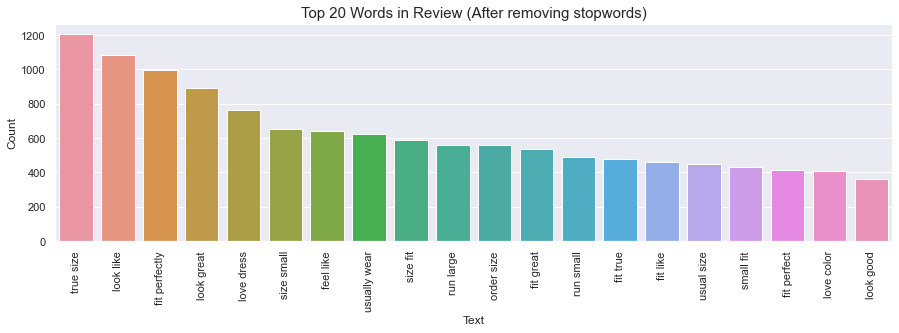

In [95]:
top_20_words = top_words(df1['Review Text'],20,2)
# Covert top_20_words into dataframe
dftopwords5=pd.DataFrame(top_20_words,columns=['Text', 'Count'])
dftopwords5
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords5).set_title("Top 20 Words in Review (After removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

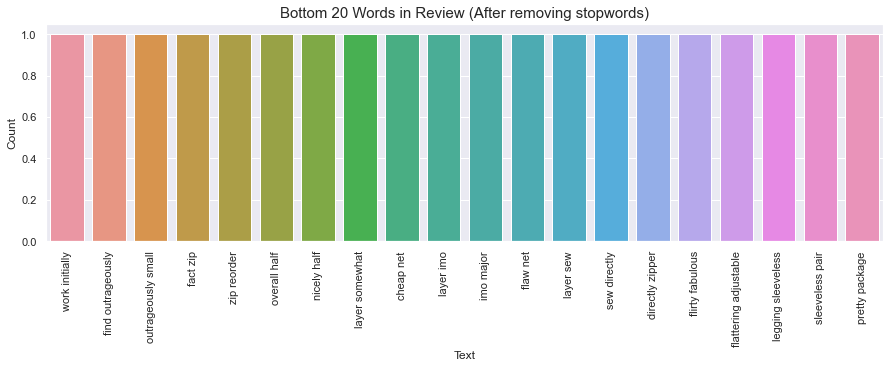

In [96]:
top_20_words_t = bottom_words(df1['Review Text'],20,2)
# Covert top_20_words into dataframe
dftopwords6=pd.DataFrame(top_20_words_t,columns=['Text', 'Count'])
dftopwords6
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords6).set_title("Bottom 20 Words in Review (After removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

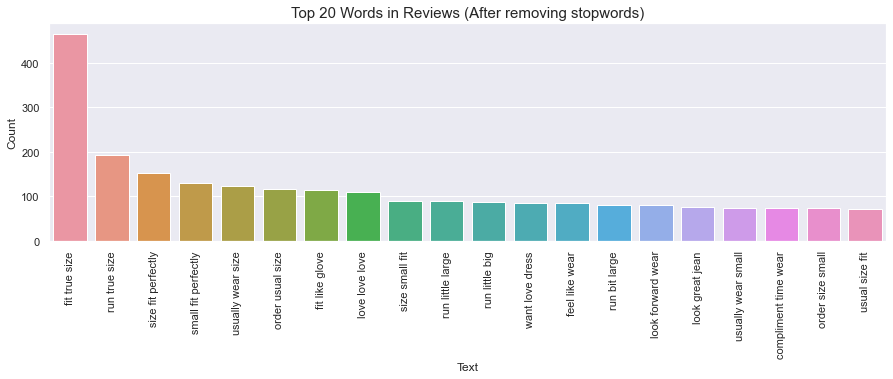

In [121]:
top_20_words1 = top_words(df1['Review Text'],20,3)
# Covert top_20_words into dataframe
dftopwords7=pd.DataFrame(top_20_words1,columns=['Text', 'Count'])
dftopwords7
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords7).set_title("Top 20 Words in Reviews (After removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [98]:
# Based on above top 20 trigrams indicates the most common words used in reviews for the shop those are mainly related to Dress class and sizes.  Those top trigrams are indicated positive trend towards the shop.

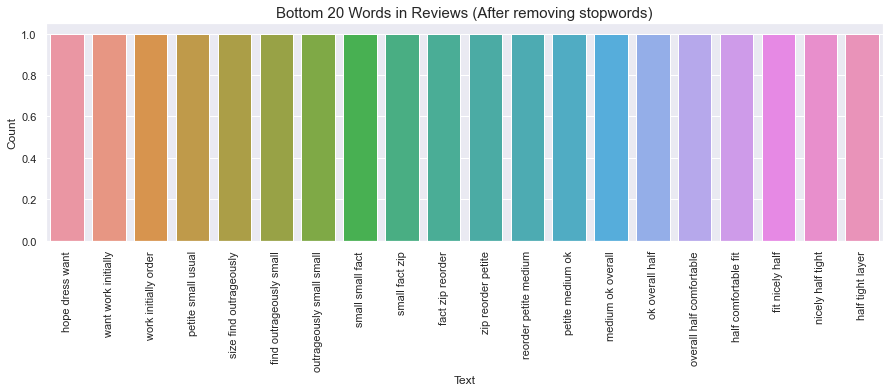

In [118]:
top_20_words_t1 = bottom_words(df1['Review Text'],20,3)
# Covert top_20_words into dataframe
dftopwords8=pd.DataFrame(top_20_words_t1,columns=['Text', 'Count'])
dftopwords8
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.barplot(x="Text", y="Count", data=dftopwords8).set_title("Bottom 20 Words in Reviews (After removing stopwords)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [100]:
# Based on above bottom 20 trigrams indicates the room for improvement related to Dress class, General Petitie Division and issues related to small size

## Feature Engineering  and Visualization

#### Add Polarity as feature using TextBlob Library

In [101]:
df1['Polarity'] = df1['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

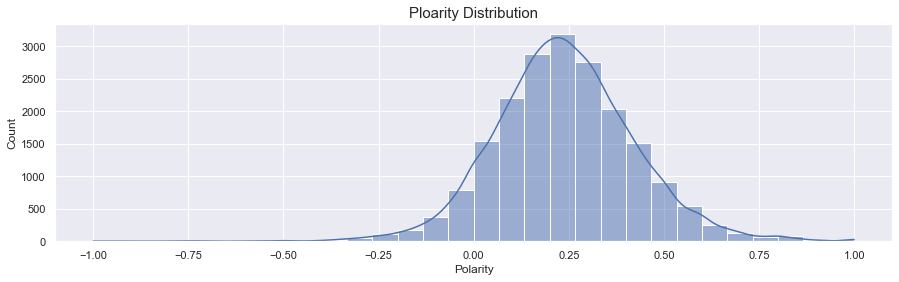

In [102]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.histplot(x="Polarity", data=df1,bins=30,kde=True).set_title("Ploarity Distribution",fontsize=15)
plt.show()

In [103]:
# Polarity are spread between -1 to 1 with the peak around 0.25.

### Text / NLP based features

Create some other features.

Char_Count = Number of Characters in Text

Word_Count = Number of Words in Text

Average Word Length = Average Number of Char in Words

Average Sentence Length =  Average Sentence Length


In [104]:
%%time
# New Features

df1['char count'] = df1['Review Text'].apply(len)
df1['word count'] = df1['Review Text'].apply(lambda x: len(x.split()))
df1['avg word lenth'] = df1['char count'] / (df1['word count']+1)
df1['avg sentence lenght'] = df1['word count'] / (df1['Review Text'].apply(lambda x: len(str(x).split("."))))


Wall time: 63 ms


In [105]:
# df1['char count title'] = df1['Title'].apply(len)
# df1['word count title'] = df1['Title'].apply(lambda x: len(x.split()))
# df1['avg word lenth title'] = df1['char count title'] / (df1['word count title']+1)
# df1['avg sentence lenght title'] = df1['word count title'] / (df1['Title'].apply(lambda x: len(str(x).split("."))))

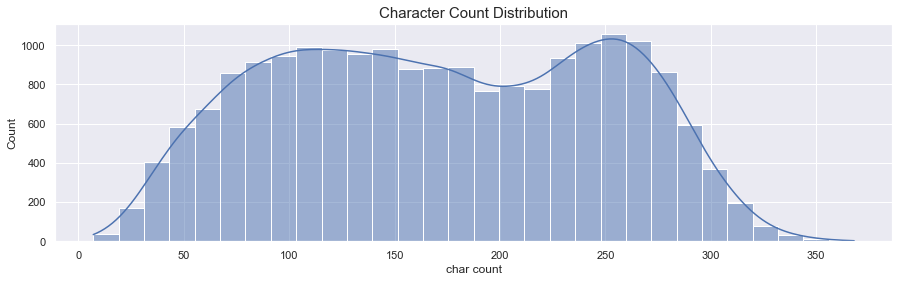

In [106]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.histplot(x="char count", data=df1,bins=30,kde=True).set_title("Character Count Distribution",fontsize=15)
plt.show()

In [107]:
# The majority of the charactor count are between 70 to 280.

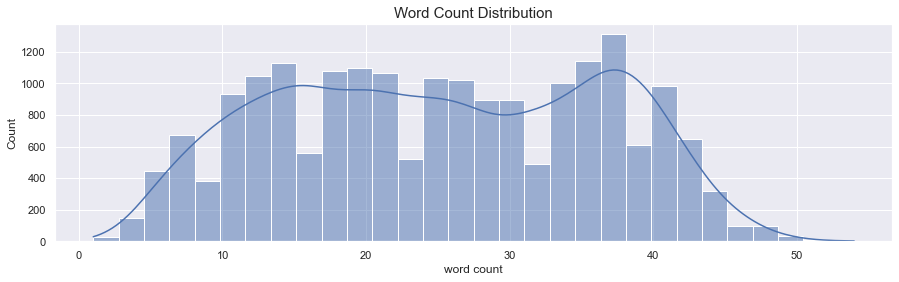

In [108]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 4))
sns.histplot(x="word count", data=df1,bins=30,kde=True).set_title("Word Count Distribution",fontsize=15)
plt.show()